In [52]:
# clone pygcn from github and setup the environment (need to run only once)
%%capture
!git clone https://github.com/tkipf/pygcn
%cd /content/pygcn
!python setup.py install

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
# train cora dataset at default parameter setting
# %%capture
%cd /content/pygcn/pygcn
!python train.py

/content/pygcn/pygcn
Loading cora dataset...
Epoch: 0001 loss_train: 1.9663 acc_train: 0.0643 loss_val: 1.9656 acc_val: 0.0967 time: 0.0245s
Epoch: 0002 loss_train: 1.9676 acc_train: 0.0786 loss_val: 1.9521 acc_val: 0.1133 time: 0.0210s
Epoch: 0003 loss_train: 1.9485 acc_train: 0.1071 loss_val: 1.9378 acc_val: 0.0967 time: 0.0215s
Epoch: 0004 loss_train: 1.9394 acc_train: 0.1214 loss_val: 1.9228 acc_val: 0.1033 time: 0.0202s
Epoch: 0005 loss_train: 1.9169 acc_train: 0.1571 loss_val: 1.9077 acc_val: 0.1033 time: 0.0203s
Epoch: 0006 loss_train: 1.8921 acc_train: 0.2571 loss_val: 1.8924 acc_val: 0.3933 time: 0.0204s
Epoch: 0007 loss_train: 1.8989 acc_train: 0.2786 loss_val: 1.8773 acc_val: 0.3533 time: 0.0206s
Epoch: 0008 loss_train: 1.8758 acc_train: 0.3071 loss_val: 1.8624 acc_val: 0.3500 time: 0.0208s
Epoch: 0009 loss_train: 1.8650 acc_train: 0.3214 loss_val: 1.8476 acc_val: 0.3500 time: 0.0211s
Epoch: 0010 loss_train: 1.8464 acc_train: 0.3071 loss_val: 1.8330 acc_val: 0.3500 time: 0.0

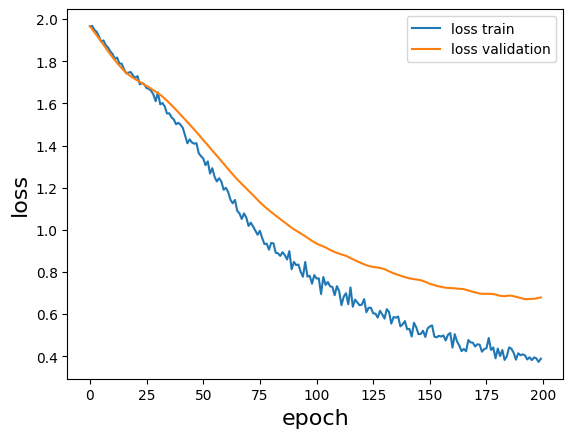

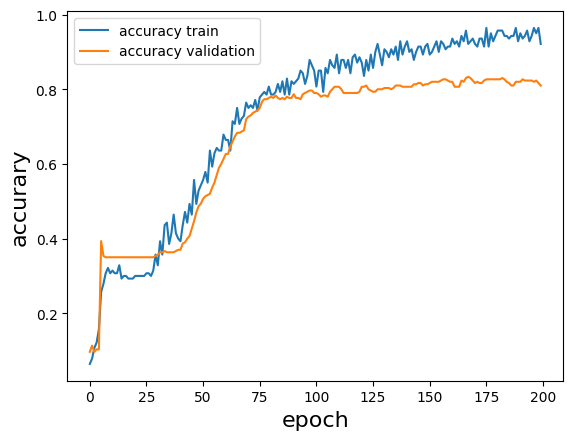

loss test:  0.717414915561676
accurary test:  0.836


In [68]:
# cora dataset default setting result
epochdata = pd.read_csv('epochdata.csv')

plt.plot(epochdata['epoch'], epochdata['loss_train'], label = "loss train")
plt.plot(epochdata['epoch'], epochdata['loss_val'], label = "loss validation")
plt.xlabel('epoch',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.legend(loc='upper right')
plt.show()

plt.plot(epochdata['epoch'], epochdata['acc_train'], label = "accuracy train")
plt.plot(epochdata['epoch'], epochdata['acc_val'], label = "accuracy validation")
plt.xlabel('epoch',fontsize=16)
plt.ylabel('accurary',fontsize=16)
plt.legend(loc='upper left')
plt.show()

print('loss test: ', epochdata['loss_test'].iloc[0])
print('accurary test: ', epochdata['acc_test'].iloc[0])

In [69]:
%%capture
lr_testResult = pd.DataFrame()

for i in range(-5, 0):
    learning_rate = 10**i
    !python train.py --lr={learning_rate}
    df = pd.read_csv('lr_result.csv')
    lr_testResult = pd.concat([lr_testResult, df], axis=0)

In [70]:
lr_testResult

,lr,loss,accuracy
0,0.00001,1.955034,0.155
0,0.00010,1.963522,0.138
0,0.00100,1.811453,0.340
0,0.01000,0.754029,0.824
0,0.10000,0.590882,0.838


In [71]:
%%capture
do_testResult = pd.DataFrame()

for i in range(1, 10):
    dout = i / 10.0
    !python train.py --dropout={dout}
    df = pd.read_csv('dropout_result.csv')
    do_testResult = pd.concat([do_testResult, df], axis=0)

In [72]:
do_testResult

,dropout,loss,accuracy
0,0.1,0.682571,0.831
0,0.2,0.701167,0.835
0,0.3,0.710899,0.838
0,0.4,0.710140,0.833
0,0.5,0.774018,0.824
0,0.6,0.732868,0.836
0,0.7,0.837276,0.805
0,0.8,0.967785,0.798
0,0.9,1.082350,0.701


In [73]:
%%capture
import zipfile
import os
from google.colab import files
# compress the folder into a zip file
!zip -r /content/CS598Final.zip /content/pygcn
